## Esperienza 2: Global Warming

In [1]:
import ultranest
import george
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ultranest.plot import cornerplot

### Data

In [2]:
# Read the data
df = pd.read_csv('data.txt', comment="%", sep='\s+',header=None,)

# Keep only the first two columns
df = df.iloc[:, :3]

# Rename columns
df.columns = ["Year", "Annual_Anomaly", "Annual_Anomaly_Error"]

# Save the data in arrays
year = np.array( df["Year"])
temp = np.array( df["Annual_Anomaly"])
temp_err = np.array( df["Annual_Anomaly_Error"])

df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5g/cpldmxds2xggtycjntr8y0w00000gn/T/ipykernel_1881/1128043359.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data.txt', comment="%", sep='\s+',header=None,)


,Year,Annual_Anomaly,Annual_Anomaly_Error
0,1850,-0.436,0.170
1,1851,-0.321,0.259
2,1852,-0.292,0.249
3,1853,-0.295,0.196
4,1854,-0.283,0.130
...,...,...,...
170,2020,1.049,0.032
171,2021,0.895,0.030
172,2022,0.936,0.031
173,2023,1.229,0.031


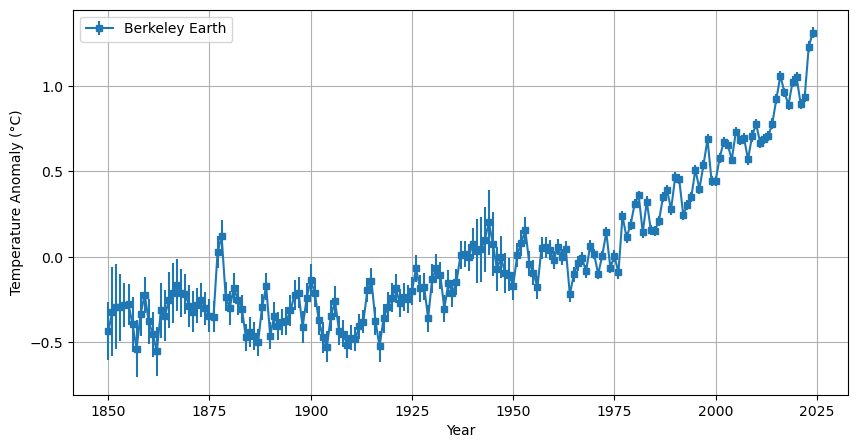

In [3]:
# Let's face the data
plt.figure(figsize=(10, 5))
plt.errorbar( df['Year'], df['Annual_Anomaly'], df['Annual_Anomaly_Error'], label='Berkeley Earth', fmt='s',  markersize= 5, linestyle= "-")
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

### Models

#### Constant Temperature
$$
T(y) = K \; ,
$$
where $T$ is the temperature anomaly and $y$ is the year.

#### Linear Temperature
$$
T(y) = a y + b \; .
$$

#### Exponential Temperature 
$$
T(y) = c e^{d y} \; .
$$


In [4]:
#====================================================================================
# Constants
const_params = ['k']        #constant temperature
lin_params = ['a', 'b']     #linear temperature
exp_params = ['c', 'd']     #exponential temperature


#====================================================================================
# Log_likelihoods

#constant 
def const_loglikelihood(params):
    (k) = params
    log_like = -np.sum(((temp - k)/temp_err)**2 + np.log(2*np.pi*temp_err**2)) / 2 
    return log_like

#linear
def lin_loglikelihood(params):
    (a, b) = params
    pred = a*(year - 1937) + b
    log_like = -np.sum(((temp - pred)/temp_err)**2 + np.log(2*np.pi*temp_err**2)) / 2 
    return log_like

#exponential
def exp_loglikelihood(params):
    (c, d) = params
    pred = c * np.exp(d * (year - 1937)) 
    log_like = -np.sum(((temp - pred)/temp_err)**2 + np.log(2*np.pi*temp_err**2)) / 2 
    return log_like


#====================================================================================
# Flat priors

#constant
def const_prior(u):
    params = u.copy()
    hi = 2
    lo = -2
    params[0] = lo + (hi-lo)*u[0]
    return params

#linear
def lin_prior(u):
    params = u.copy()
    hi = [0.05, 2]
    lo = [-0.05, -2]
    for i in range(len(hi)):
        params[i] = lo[i] + (hi[i]-lo[i])*u[i]
    
    return params

#exponential
def exp_prior(u):
    params = u.copy()
    hi = [1, 0.5]
    lo = [-1, 0.]
    for i in range(len(hi)):
        params[i] = lo[i] + (hi[i]-lo[i])*u[i]
    
    return params

In [5]:
const_sampler = ultranest.ReactiveNestedSampler(const_params, const_loglikelihood, const_prior)
lin_sampler = ultranest.ReactiveNestedSampler(lin_params, lin_loglikelihood, lin_prior)
exp_sampler = ultranest.ReactiveNestedSampler(exp_params, exp_loglikelihood, exp_prior)

In [6]:
print('\nInference with constant temperature model:\n')
const_result = const_sampler.run(min_num_live_points=1000, viz_callback=None)


Inference with constant temperature model:

[ultranest] Sampling 1000 live points from prior ...
[ultranest] Explored until L=-7e+03  966.31 [-6966.3088..-6966.3088]*| it/evals=9500/10648 eff=98.4660% N=1000   0 
[ultranest] Likelihood function evaluations: 10667
[ultranest]   logZ = -6973 +- 0.05427
[ultranest] Effective samples strategy satisfied (ESS = 3157.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.08 bs:0.05 tail:0.04 total:0.07 required:<0.50
[ultranest] done iterating.


In [7]:
print('\nInference with linear temperature model:\n')
lin_result = lin_sampler.run(min_num_live_points=1000, viz_callback=None)


Inference with linear temperature model:

[ultranest] Sampling 1000 live points from prior ...
[ultranest] Explored until L=-1e+03  408.72 [-1408.7339..-1408.7339]*| it/evals=16600/21317 eff=81.7050% N=1000   0 
[ultranest] Likelihood function evaluations: 21425
[ultranest]   logZ = -1421 +- 0.06673
[ultranest] Effective samples strategy satisfied (ESS = 4015.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.04 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.


In [8]:
print('\nInference with exponential temperature model:\n')
exp_result = exp_sampler.run(min_num_live_points=1000, viz_callback=None)


Inference with exponential temperature model:

[ultranest] Sampling 1000 live points from prior ...
[ultranest] Explored until L=-8e+02  .04 [-774.0515..-774.0515]*| it/evals=18600/36082 eff=53.0186% N=1000    0  0 00   0 
[ultranest] Likelihood function evaluations: 36092
[ultranest]   logZ = -788 +- 0.07698
[ultranest] Effective samples strategy satisfied (ESS = 3982.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.04 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.


In [9]:
print('\nConstant temperature model:')
const_sampler.print_results()
print('\nLinear temperature model:')
lin_sampler.print_results()
print('\nExponential temperature model:')
exp_sampler.print_results()



Constant temperature model:

logZ = -6972.540 +- 0.096
  single instance: logZ = -6972.540 +- 0.076
  bootstrapped   : logZ = -6972.530 +- 0.089
  tail           : logZ = +- 0.037
insert order U test : converged: True correlation: inf iterations

    k                   : 0.3397│ ▁▁▁▁▁▁▁▁▁▁▂▂▃▄▅▅▅▇▇▇▇▇▅▅▄▃▃▂▂▁▁▁▁▁▁▁▁ │0.3691    0.3551 +- 0.0035


Linear temperature model:

logZ = -1420.817 +- 0.209
  single instance: logZ = -1420.817 +- 0.105
  bootstrapped   : logZ = -1420.802 +- 0.209
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    a                   : 0.009683│ ▁ ▁▁▁▁▁▁▁▁▂▂▃▄▄▆▆▇▇▇▇▇▆▅▄▃▂▁▁▁▁▁▁▁▁▁▁ │0.010519    0.010109 +- 0.000095
    b                   : -0.1129│ ▁▁▁▁▁▁▁▁▂▂▃▄▅▆▆▇▇▇▇▆▆▅▃▃▂▂▁▁▁▁▁▁▁▁  ▁ │-0.0648    -0.0909 +- 0.0055


Exponential temperature model:

logZ = -788.051 +- 0.207
  single instance: logZ = -788.051 +- 0.114
  bootstrapped   : logZ = -788.012 +- 0.207
  tail           : logZ = +- 0.010
insert order

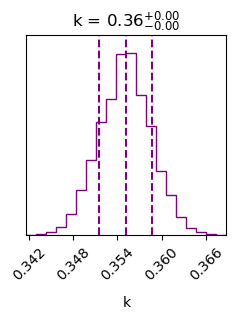

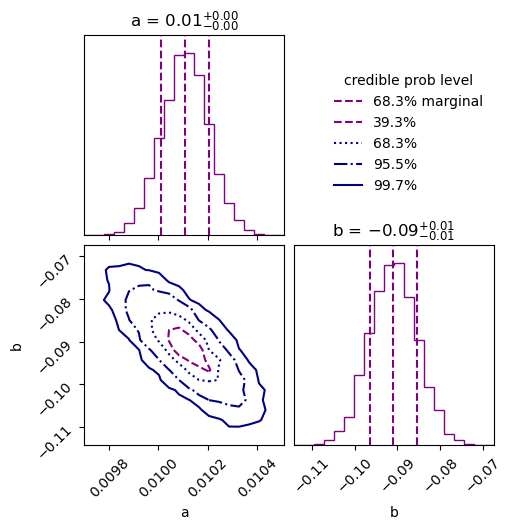

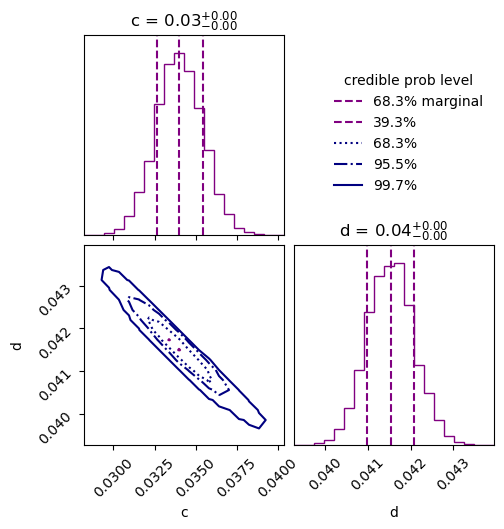

In [10]:
cornerplot(const_result);
cornerplot(lin_result);
cornerplot(exp_result);

In [11]:
#inferred parameters

#constant temperature
const_samples = const_result["samples"][:, 0] 
k_best = np.median(const_samples)
k_lower_95, k_upper_95 = np.percentile(const_samples, [2.5, 97.5])


#linear temperature
a_lin_samples = lin_result["samples"][:, 0] 
a_best = np.median(a_lin_samples)
a_lower_95, a_upper_95 = np.percentile(a_lin_samples, [2.5, 9.5])

b_lin_samples = lin_result["samples"][:, 1] 
b_best = np.median(b_lin_samples)
b_lower_95, b_upper_95 = np.percentile(b_lin_samples, [2.5, 97.5])

#esponential temperature
c_exp_samples = exp_result["samples"][:, 1] 
c_best = np.median(c_exp_samples)
c_lower_95, c_upper_95 = np.percentile(c_exp_samples, [2.5, 97.5])

d_exp_samples = exp_result["samples"][:, 1] 
d_best = np.median(d_exp_samples)
d_lower_95, d_upper_95 = np.percentile(d_exp_samples, [2.5, 97.5])

# Print the results
print(f"Constant Model of Temperature:\nBest estimate of k: {k_best:.3f}")
print(f"95% Credible Interval: [{k_lower_95:.3f}, {k_upper_95:.3f}]\n")

print(f"Linear Model of Temperature:\nBest estimate of a: {a_best:.3f}")
print(f"95% Credible Interval: [{a_lower_95:.3f}, {a_upper_95:.3f}]")
print(f"Best estimate of b: {b_best:.3f}")
print(f"95% Credible Interval: [{b_lower_95:.3f}, {b_upper_95:.3f}]\n")

print(f"Exponential Model of Temperature:\nBest estimate of c: {c_best:.3f}")
print(f"95% Credible Interval: [{c_lower_95:.3f}, {c_upper_95:.3f}]")
print(f"Best estimate of d: {d_best:.3f}")
print(f"95% Credible Interval: [{d_lower_95:.3f}, {d_upper_95:.3f}]\n")

Constant Model of Temperature:
Best estimate of k: 0.355
95% Credible Interval: [0.348, 0.362]

Linear Model of Temperature:
Best estimate of a: 0.010
95% Credible Interval: [0.010, 0.010]
Best estimate of b: -0.091
95% Credible Interval: [-0.102, -0.080]

Exponential Model of Temperature:
Best estimate of c: 0.042
95% Credible Interval: [0.040, 0.043]
Best estimate of d: 0.042
95% Credible Interval: [0.040, 0.043]



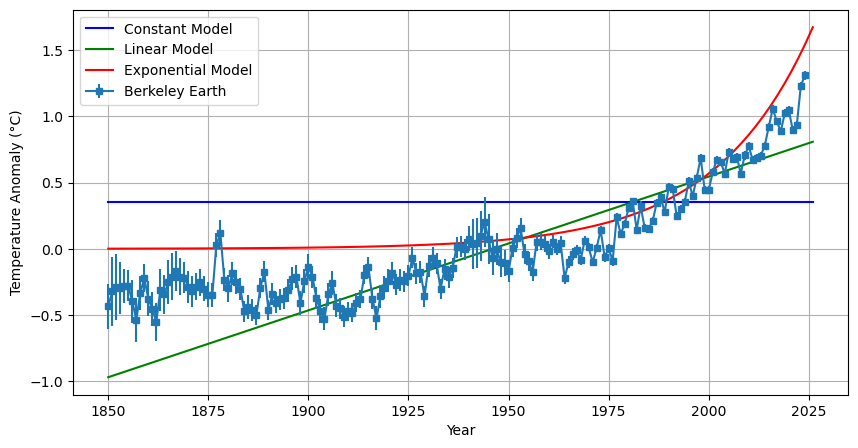

In [12]:
plt.figure(figsize=(10, 5))

# Define x range
x = np.linspace(1850, 2026, 100)  
# Plot the constant function
plt.plot(x, np.full_like(x, k_best), label="Constant Model", color="blue")

# Plot the linear function
plt.plot(x, a_best * (x - 1937) + b_best, label="Linear Model", color="green")

# Plot the exponential function
plt.plot(x, c_best * np.exp(d_best*(x - 1937)) , label="Exponential Model", color="red")
#plt.fill_between(x, c_lower_95 * np.exp(d_lower_95*(x - 1937)), c_upper_95 * np.exp(d_upper_95*(x - 1937)), label = "95% Credible Interval", color = "yellow")


plt.errorbar( df['Year'], df['Annual_Anomaly'], df['Annual_Anomaly_Error'], label='Berkeley Earth', fmt='s',  markersize= 5, linestyle= "-")
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

### Model comparison

Our aim is to understand which model predicts better our data $D$. To do so we use Bayes factor $K$, the ratio between the likelihoods $Z_i \equiv P(D|M_i)$ and $Z_j \equiv P(D|M_i)$ of models $M_i$ and $M_j$ we want to compare.

$$
    K \equiv \frac{P(D|M_i)}{P(D|M_j)} = \frac{Z_i}{Z_j} = \frac{\int d\theta _i P(\theta _i|M_i) P(D|\theta _i,M_i)}{\int d\theta _ j P(\theta _j|M_j) P(D|\theta _j,M_j)} \; ,
$$
where
$$
K = \frac{Z_i}{Z_j} = \frac{e^{\ln{Z_i}}}{e^{\ln{Z_j}}} = \exp{\left(\ln{Z_i} - \ln{Z_j}\right)} \; .
$$



In [14]:
exp_result['logz'] - lin_result['logz']

632.7655963947477

In [13]:
#Bayes factor evaluation

#lin/const
#K_lin_const = np.exp( lin_result['logz'] - const_result['logz'] )
#print("K (lin/const) = " , K_lin_const)
#print("The linear temperature model is" , K_lin_const,  "times more probable than the constant temperature model")

#exp/lin
K_exp_lin = np.exp( exp_result['logz'] - lin_result['logz'] )
print("K (exp/lin) = " , K_exp_lin)
print("The exponential temperature model is", K_exp_lin, "times more probable than the linear temperature model assuming the models are equally probable a priori.")


K (exp/lin) =  6.406293806346846e+274
The exponential temperature model is 6.406293806346846e+274 times more probable than the linear temperature model assuming the models are equally probable a priori.


## Gaussian Process Regression

In [ ]:
from george import kernels

kernel = np.var(df['Annual_Anomaly']) * kernels.ExpSquaredKernel(0.5)   #initial test with 0.5 variance
gp.gerorge.GP(kernel)
gp.compute(x, df['Annual_Anomaly_Error'])

x_pred = np.linspace(1850, 2026, 500)
pred, pred_var = gp.predict(y, x_pred, return_var = True)

plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color = "k", alpha = 0.2)

plt.plot(x_pred, pred, "k", lw = 1.5, alpha = 0.5)
plt.error
